In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf


from tensorflow import keras
from  matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import matplotlib.image as mpimg
%matplotlib inline

# Image Dataset
CIFAR-10

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


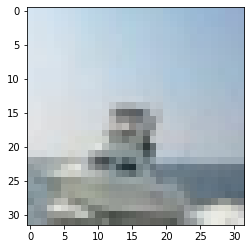

In [6]:
plt.imshow(x_train[100])
print(y_train[100])

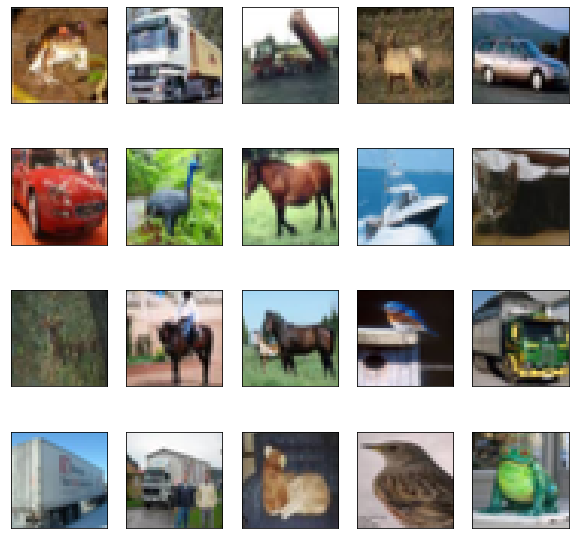

In [7]:
plt.figure(figsize = (10,10))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Pretrain Model (NetInNet)

In [9]:
model = models.Sequential([
    layers.Conv2D(192, (5,5), activation = 'relu', input_shape=input_shape, strides = 1, padding = 'same'),
    layers.Conv2D(160, (1,1), activation = 'relu', strides = 1, padding = 'valid'),
    layers.Conv2D(96, (1,1), activation = 'relu', strides = 1, padding = 'valid'),
    layers.MaxPooling2D((2,2), padding = 'same', strides = 2),
    layers.Dropout(0.5),

    layers.Conv2D(192, (5,5), activation = 'relu', strides = 1, padding = 'same'),
    layers.Conv2D(192, (1,1), activation = 'relu', strides = 1, padding = 'valid'),
    layers.Conv2D(192, (1,1), activation = 'relu', strides = 1, padding = 'valid'),
    layers.MaxPooling2D((2,2), padding = 'same', strides = 2),
    layers.Dropout(0.5),

    layers.Conv2D(192, (3,3), activation = 'relu', strides = 1, padding = 'same'),
    layers.Conv2D(192, (1,1), activation = 'relu', strides = 1, padding = 'valid'),
    layers.Conv2D(10, (1,1), activation = 'relu', strides = 1, padding = 'valid'),
    
    layers.GlobalAveragePooling2D(),
    layers.Softmax()
])




          



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 192)       14592     
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 160)       30880     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        15456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 192)       460992    
                                                        

In [11]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)

/usr/local/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [12]:
model.compile(optimizer=optimizer, 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Train 50 epochs

In [20]:
history = model.fit(x_train, 
                    y_train, 
                    epochs = 50,
                    shuffle = True)

Epoch 1/50
1563/1563 [==============================] - 310s 198ms/step - loss: 1.9723 - accuracy: 0.2660
Epoch 2/50
1563/1563 [==============================] - 300s 192ms/step - loss: 1.6858 - accuracy: 0.3663
Epoch 3/50
1563/1563 [==============================] - 294s 188ms/step - loss: 1.5588 - accuracy: 0.4184
Epoch 4/50
1563/1563 [==============================] - 288s 184ms/step - loss: 1.4595 - accuracy: 0.4626
Epoch 5/50
1563/1563 [==============================] - 285s 182ms/step - loss: 1.3734 - accuracy: 0.4983
Epoch 6/50
1563/1563 [==============================] - 284s 182ms/step - loss: 1.3026 - accuracy: 0.5252
Epoch 7/50
1563/1563 [==============================] - 284s 182ms/step - loss: 1.2398 - accuracy: 0.5509
Epoch 8/50
1563/1563 [==============================] - 284s 182ms/step - loss: 1.1878 - accuracy: 0.5715
Epoch 9/50
1563/1563 [==============================] - 284s 182ms/step - loss: 1.1349 - accuracy: 0.5905
Epoch 10/50
1563/1563 [=======================

Train another 50 epochs

In [10]:
history = model.fit(x_train, 
                    y_train, 
                    epochs = 50,
                    shuffle = True)

Epoch 1/50
1563/1563 [==============================] - 282s 180ms/step - loss: 0.4739 - accuracy: 0.8345
Epoch 2/50
1563/1563 [==============================] - 283s 181ms/step - loss: 0.4634 - accuracy: 0.8401
Epoch 3/50
1563/1563 [==============================] - 297s 190ms/step - loss: 0.4554 - accuracy: 0.8427
Epoch 4/50
1563/1563 [==============================] - 379s 243ms/step - loss: 0.4502 - accuracy: 0.8412
Epoch 5/50
1563/1563 [==============================] - 357s 229ms/step - loss: 0.4460 - accuracy: 0.8449
Epoch 6/50
1563/1563 [==============================] - 342s 218ms/step - loss: 0.4397 - accuracy: 0.8455
Epoch 7/50
1563/1563 [==============================] - 316s 202ms/step - loss: 0.4300 - accuracy: 0.8491
Epoch 8/50
1563/1563 [==============================] - 319s 204ms/step - loss: 0.4253 - accuracy: 0.8519
Epoch 9/50
1563/1563 [==============================] - 311s 199ms/step - loss: 0.4191 - accuracy: 0.8545
Epoch 10/50
1563/1563 [=======================

In [11]:
model.save('nin_cifar10.h5')score, acc = model.evaluate(x_test, y_test)
print("Test Accuracy: %.5f" % acc)

313/313 [==============================] - 13s 40ms/step - loss: 0.5759 - accuracy: 0.8292
Test Accuracy: 0.82920


In [12]:
model.save('nin_cifar10.h5')

# Construct adversarial examples

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model = load_model('nin_cifar10.h5')

In [9]:
score, acc = model.evaluate(x_test, 
                            y_test)

print ("Test Accuracy: %.5f" % acc)

313/313 [==============================] - 34s 108ms/step - loss: 0.5759 - accuracy: 0.8292
Test Accuracy: 0.82920


## Fast Gradient Sign Method (FGSM)

In [8]:
def data_preprocessing(x_):
    x = tf.convert_to_tensor(x_, dtype=tf.float32)
    return x

In [9]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(x, y):
    # Use gradientTape to record gradients
    with tf.GradientTape() as tape:
        tape.watch(x)
        prediction = model(x)
        loss = loss_object(y, prediction)

    gradient = tape.gradient(loss, x)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [10]:
# Generate all perturbations together leads to dead kernel, so split into two parts
x_test_1 = data_preprocessing(x_test[0:5000])
x_test_2 = data_preprocessing(x_test[5000:10000])

In [11]:
perturb_1 = create_adversarial_pattern(x_test_1, y_test[0:5000])

In [12]:
perturb_2 = create_adversarial_pattern(x_test_2, y_test[5000:10000])

In [13]:
perturb = tf.concat([perturb_1,perturb_2], 0)

Test effects of different epsilons

In [14]:
e = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]
for i, eps in enumerate(e):
    x_fgsm = x_test + perturb*eps
    score, acc = model.evaluate(x_fgsm, y_test)
    print ('Epsilon : {0}, Test Accuracy: {1}'.format(eps, acc))

313/313 [==============================] - 39s 124ms/step - loss: 3.9323 - accuracy: 0.3313
Epsilon : 0.01, Test Accuracy: 0.3312999904155731
313/313 [==============================] - 36s 116ms/step - loss: 9.8494 - accuracy: 0.0835
Epsilon : 0.03, Test Accuracy: 0.08349999785423279
313/313 [==============================] - 36s 115ms/step - loss: 11.5233 - accuracy: 0.0765
Epsilon : 0.05, Test Accuracy: 0.07649999856948853
313/313 [==============================] - 39s 125ms/step - loss: 11.7583 - accuracy: 0.0817
Epsilon : 0.07, Test Accuracy: 0.08169999718666077
313/313 [==============================] - 37s 119ms/step - loss: 11.6486 - accuracy: 0.0913
Epsilon : 0.09, Test Accuracy: 0.09130000323057175
313/313 [==============================] - 37s 118ms/step - loss: 11.5745 - accuracy: 0.0952
Epsilon : 0.1, Test Accuracy: 0.09520000219345093


In [32]:
x_test_fgsm_003 = tf.clip_by_value(x_test + perturb*0.03, -1, 1)
x_test_fgsm_005 = tf.clip_by_value(x_test + perturb*0.05, -1, 1)
x_test_fgsm_007 = tf.clip_by_value(x_test + perturb*0.07, -1, 1)

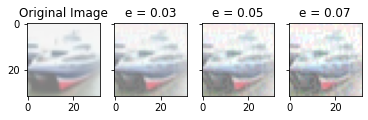

In [35]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True)
ax1.imshow(x_test_1[1]*0.5+0.5)
ax1.set_title("Original Image")
ax2.imshow(x_test_fgsm_003[1]*0.5+0.5)
ax2.set_title("e = 0.03")
ax3.imshow(x_test_fgsm_005[1]*0.5+0.5)
ax3.set_title("e = 0.05")
ax4.imshow(x_test_fgsm_007[1]*0.5+0.5)
ax4.set_title("e = 0.07")

plt.show()

Consider we are designing a CAPTCHA, it seems e = 0.05 is an acceptable value, where the accuracy of model is low and the image is still recognizable.

However, for some images, using FGSM leads to unrecognizable results even with small e (like 0.03), which is unacceptable in CAPTCHAs.

## One-pixel Attack (Black-box)

One-pixel attack will only change a few pixels of images and should reduce the problem of FGSM

In [10]:
from scipy.optimize import differential_evolution

In [11]:
# Use original label
(x_train_op, y_train_op), (x_op, y_op) = datasets.cifar10.load_data()

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
def perturb_image(xs, img):
    if xs.ndim < 2:
        xs = np.array([xs])

    tile = [len(xs)] + [1]*(xs.ndim+1)
    imgs = np.tile(img, tile)
    xs = xs.astype(int)
    
    for x,img in zip(xs, imgs):
        pixels = np.split(x, len(x) // 5)
        for pixel in pixels:
            x_pos, y_pos, *rgb = pixel
            img[x_pos, y_pos] = rgb
    
    return imgs

In [14]:
def predict_classes(xs, img, target_class, model, minimize=True):
    # Perturb the image with xs
    imgs_perturbed = perturb_image(xs, img)
    #plt.imshow(imgs_perturbed[0])
    result = model.predict(imgs_perturbed)
    #print('After perturbation, prediction result is：', class_names[np.argmax(result)])
    predictions = result[:,target_class]
    return predictions if minimize else 1 - predictions

In [15]:
def attack_success(x, img, target_class, model, targeted_attack=False, verbose=False):
    # Perturb the image with xs
    attack_image = perturb_image(x, img)
    confidence = model.predict(attack_image)[0]
    predicted_class = np.argmax(confidence)
    
    if verbose:
        print('Confidence:', confidence[target_class])
    if ((targeted_attack and predicted_class == target_class) or
        (not targeted_attack and predicted_class != target_class)):
        return True

In [16]:
def attack(img_id, model, target=None, pixel_count=1, maxiter=20, popsize=400, verbose=False):
    targeted_attack = target is not None
    target_class = target if targeted_attack else y_op[img_id, 0]
    
    # Define bounds
    bounds = [(0,32), (0,32), (0,1), (0,1), (0,1)] * pixel_count
    
    # Population multiplier
    popmul = max(1, popsize // len(bounds))
    
    # Format the predict/callback functions
    def predict_fn(xs):
        return predict_classes(xs, x_test[img_id], target_class, 
                               model, target is None)
    
    def callback_fn(x, convergence):
        return attack_success(x, x_test[img_id], target_class, 
                              model, targeted_attack, verbose)
    
    # Differential Evolution
    attack_result = differential_evolution(
        predict_fn, bounds, maxiter=maxiter, popsize=popmul,
        recombination=1, atol=-1, callback=callback_fn, polish=False)

    #print('Attack result is:', attack_result.x)
    attack_image = perturb_image(attack_result.x, x_test[img_id])[0]
    prior_probs = model.predict(tf.reshape(x_test[img_id], [1,32,32,3]))
    predicted_probs = model.predict(tf.reshape(attack_image,[1,32,32,3]))
    predicted_class = np.argmax(predicted_probs)
    actual_class = y_op[img_id, 0]
    success = predicted_class != actual_class
    cdiff = prior_probs[0][actual_class] - predicted_probs[0][actual_class]

    # Show the best attempt at a solution (successful or not)
    #plt.imshow(attack_image)
    print('Target class is:', class_names[target_class])
    print('Prediction class is: ', class_names[predicted_class])

    return [model.name, pixel_count, img_id, actual_class, predicted_class, success, cdiff, prior_probs, predicted_probs, attack_result.x]

Confidence: 0.0043750363
Attack result is: [ 9.8440073  20.26223353  0.58612923  0.33744237  0.8414637 ]
Target class is: cat
Prediction class is:  dog
Confidence: 0.008084312
Attack result is: [17.43310233 19.26064721  0.2999204   0.17776448  0.81598322]
Target class is: ship
Prediction class is:  automobile
Confidence: 0.9999008
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Confidence: 0.99984753
Attack result is: [24.10508299 11.27715473  0.39022449  0.67176242  0.54713161]
Target class is: ship
Prediction class is:  ship
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Confidence: 0.7990412
Attack result is: [ 8.94912259 11.29930145  0.61679039  0.64157755  0.48965698]
Target class is: airplane
Predi

Confidence: 0.98395467
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Confidence: 0.98083764
Attack result is: [5.84754445 7.40409524 0.79605875 0.88380001 0.16902271]
Target class is: frog
Prediction class is:  frog
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Confidence: 0.9873029
Attack result is: [11.09827976 10.3421998   0.035538    0.60615744  0.61563633]
Target class is: frog
Prediction class is:  frog
Confidence: 0.99583673
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Confidence: 0.9941697
Attack result is: [9.82685977 8.32607092 0.42277547 0.15652337 0.602375  ]
T

Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Confidence: 0.9262681
Attack result is: [24.53196591 23.4944732   0.51493309  0.62961438  0.54090576]
Target class is: frog
Prediction class is:  frog
Confidence: 0.9999329
Confidence: 0.9999329
Confidence: 0.99993026
Confidence: 0.99993026
Confidence: 0.99993026
Confidence: 0.99993026
Confidence: 0.99993026
Confidence: 0.99993026
Confidence: 0.99993026
Confidence: 0.99993026
Attack result is: [16.18073836 18.47510891  0.02663425  0.34288506  0.84158093]
Target class is: horse
Prediction class is:  horse
Confidence: 0.0006259652
Attack result is: [16.93348717 13.62104739  0.41256092  0.79166676  0.88156354]
Target class is: cat
Prediction class is:  dog
Confidence: 0.98458976
Confidence: 0.98458976
Confidence: 0.98458976
Confidence: 0.98458976
Confidence: 0.98458976
Confidence: 0.98458976
Co

Confidence: 0.9999869
Confidence: 0.9999869
Confidence: 0.9999869
Confidence: 0.999984
Confidence: 0.999984
Confidence: 0.999984
Confidence: 0.999984
Confidence: 0.999984
Confidence: 0.999984
Confidence: 0.999984
Attack result is: [16.28990829 16.25274688  0.26424708  0.08984455  0.3898688 ]
Target class is: truck
Prediction class is:  truck
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Confidence: 0.80627704
Attack result is: [9.7347743  7.18854337 0.42803975 0.27427175 0.53562398]
Target class is: airplane
Prediction class is:  airplane
Confidence: 0.063450485
Attack result is: [16.9911681  21.94836071  0.31568572  0.41543081  0.47459385]
Target class is: cat
Prediction class is:  dog
Confidence: 0.9477112
Confidence: 0.9477112
Confidence: 0.9477112
Confidence: 0.9477112
Confidence: 0.9477112
Confidence: 0.9477112
Confidence:

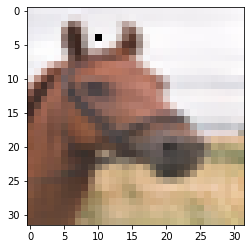

In [91]:
# Perturb test sets 0:100
attack_success_ct_1 = 0;

for id in range(100):
    pixels = 1
    max_iter = 10
    res = attack(id, model, pixel_count=pixels, verbose = True, maxiter=max_iter)
    if(res[5]):
        attack_success_ct_1 += 1
print('Attack success rate:', attack_success_ct_1/100.0)

Confidence: 0.00450894
Attack result is: [10.6411334  20.76773196  0.49974689  0.35299283  0.18654477  7.44311374
 19.7370592   0.43886409  0.19683833  0.69457712]
Target class is: cat
Prediction class is:  dog
Confidence: 0.0027001328
Attack result is: [17.28582984 19.11286703  0.18911289  0.50087612  0.35996199 15.81959737
 29.51920038  0.17127374  0.43511264  0.33236176]
Target class is: ship
Prediction class is:  automobile
Confidence: 0.99893516
Confidence: 0.99893516
Confidence: 0.9986964
Confidence: 0.99700975
Confidence: 0.99700975
Confidence: 0.99700975
Confidence: 0.99700975
Confidence: 0.99700975
Confidence: 0.99700975
Confidence: 0.99700975
Attack result is: [24.01616435 11.06631642  0.71942465  0.06504562  0.66723273  2.34678337
 11.26200174  0.32090401  0.88279004  0.79594256]
Target class is: ship
Prediction class is:  ship
Confidence: 0.59357864
Confidence: 0.59357864
Confidence: 0.3911175
Attack result is: [ 9.28168487 13.05379163  0.38248666  0.69738103  0.30873758  8

Confidence: 0.80364114
Confidence: 0.7705441
Confidence: 0.7705441
Confidence: 0.7705441
Confidence: 0.71929556
Confidence: 0.63329035
Confidence: 0.6191919
Confidence: 0.598179
Confidence: 0.598179
Confidence: 0.598179
Attack result is: [19.77260538 24.75252172  0.87343047  0.28048138  0.63479835 15.93554781
 27.3602512   0.94522197  0.62214378  0.50626436]
Target class is: airplane
Prediction class is:  airplane
Confidence: 0.9999192
Confidence: 0.99985003
Confidence: 0.99985003
Confidence: 0.9998118
Confidence: 0.99973303
Confidence: 0.9996401
Confidence: 0.9996401
Confidence: 0.9996401
Confidence: 0.9996401
Confidence: 0.9996401
Attack result is: [ 7.11278239 24.80054669  0.3824199   0.03901976  0.67911272  6.48792173
 21.26751191  0.69387806  0.74139833  0.33384432]
Target class is: truck
Prediction class is:  truck
Confidence: 0.94892156
Confidence: 0.8562493
Confidence: 0.8562493
Confidence: 0.8562493
Confidence: 0.8562493
Confidence: 0.8562493
Confidence: 0.8562493
Confidence: 

Confidence: 0.0022509652
Attack result is: [10.3409178  14.99713541  0.34610103  0.59849921  0.03643674 27.384846
 19.87300491  0.09750273  0.42049964  0.19477967]
Target class is: airplane
Prediction class is:  horse
Confidence: 0.042094823
Attack result is: [ 9.02480234 15.13456972  0.50526882  0.77449012  0.61043243 13.67866663
 19.0593269   0.66215528  0.59269009  0.80728255]
Target class is: cat
Prediction class is:  frog
Confidence: 0.11955025
Attack result is: [ 9.0798442  29.74902257  0.76830715  0.59278562  0.10617391 20.54553884
  9.37421685  0.61682846  0.73242985  0.7830983 ]
Target class is: ship
Prediction class is:  airplane
Confidence: 0.59581774
Confidence: 0.06618764
Attack result is: [26.82720753 16.51176912  0.88897368  0.51954586  0.37931003  7.87323151
 24.68357732  0.23986338  0.51049528  0.03999365]
Target class is: ship
Prediction class is:  airplane
Confidence: 0.93901134
Confidence: 0.93901134
Confidence: 0.93901134
Confidence: 0.93557835
Confidence: 0.914043

Confidence: 0.99215794
Confidence: 0.98967814
Confidence: 0.98498756
Confidence: 0.97850615
Confidence: 0.97458977
Confidence: 0.96429604
Confidence: 0.96429604
Confidence: 0.95622796
Confidence: 0.95622796
Confidence: 0.95622796
Attack result is: [2.15300179e+01 2.50739021e+01 6.05729598e-01 2.38232816e-01
 3.14305790e-01 2.25744202e+01 2.56496726e+01 7.19092668e-01
 1.89210030e-02 6.08952337e-01]
Target class is: automobile
Prediction class is:  automobile
Confidence: 0.99977654
Confidence: 0.99955016
Confidence: 0.99955016
Confidence: 0.99955016
Confidence: 0.99955016
Confidence: 0.99955016
Confidence: 0.99944407
Confidence: 0.9984469
Confidence: 0.9984469
Confidence: 0.9984469
Attack result is: [27.90095531 17.21746719  0.49054733  0.68752781  0.18455025 26.72683447
 11.20655015  0.10445276  0.23423334  0.68066944]
Target class is: automobile
Prediction class is:  automobile
Confidence: 0.045153648
Attack result is: [20.34408479 23.17159482  0.80119272  0.90566827  0.42169026 20.22

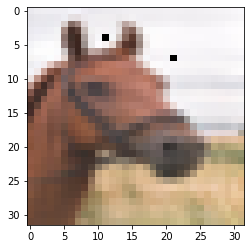

In [88]:
# Perturb test sets 0:100
attack_success_ct = 0;

for id in range(100):
    pixels = 2
    max_iter = 10
    res = attack(id, model, pixel_count=pixels, verbose = True, maxiter=max_iter)
    if(res[5]):
        attack_success_ct += 1
print('Attack success rate:', attack_success_ct/100.0)

Confidence: 0.0006434777
Attack result is: [ 9.36948678 20.39672394  0.98444347  0.54196505  0.17151785 31.84898595
 17.28938142  0.83923282  0.35598168  0.45867355 13.43163233 19.14988053
  0.56052743  0.09941141  0.91533634]
Target class is: cat
Prediction class is:  dog
Confidence: 8.5984044e-05
Attack result is: [17.26683314 19.14510806  0.17455023  0.671657    0.70410292 28.18122416
 23.52941281  0.26585495  0.6208382   0.91731645 20.46011794  4.42070357
  0.09366277  0.92701234  0.74261826]
Target class is: ship
Prediction class is:  automobile
Confidence: 0.98553675
Confidence: 0.98553675
Confidence: 0.98553675
Confidence: 0.98553675
Confidence: 0.97288877
Confidence: 0.97288877
Confidence: 0.97288877
Confidence: 0.97288877
Confidence: 0.97288877
Confidence: 0.97288877
Attack result is: [25.14102989  4.85409383  0.5673006   0.48638839  0.05779367 26.54935651
 13.80481029  0.7011753   0.55791284  0.9973177  21.63186387 26.47531557
  0.15972993  0.61739913  0.28950083]
Target clas

Confidence: 0.72843516
Confidence: 0.12271494
Attack result is: [ 4.97250483 18.91195676  0.92382856  0.79262576  0.84971133  6.70287121
 12.75428911  0.79199223  0.87807642  0.36597061  9.73993696  6.30018776
  0.14378992  0.09307216  0.27822552]
Target class is: airplane
Prediction class is:  ship
Confidence: 0.1825825
Attack result is: [1.64042697e+01 1.76860378e+01 6.93743264e-01 2.73952307e-01
 9.09542097e-01 1.45092372e+01 2.07266957e+01 6.28961775e-01
 5.03150208e-01 8.25194523e-03 1.21618597e+01 7.56975822e+00
 9.22611902e-01 3.17904589e-01 7.35466291e-01]
Target class is: deer
Prediction class is:  airplane
Confidence: 0.9999957
Confidence: 0.9999957
Confidence: 0.9999957
Confidence: 0.9999957
Confidence: 0.9999957
Confidence: 0.99999475
Confidence: 0.9999938
Confidence: 0.9999933
Confidence: 0.9999933
Confidence: 0.9999933
Attack result is: [ 4.45951301 27.55335752  0.92480047  0.34496203  0.28703007 28.66679643
 28.91014024  0.40976996  0.67444754  0.12805783 20.58801069 29.

Confidence: 0.99989057
Confidence: 0.99967635
Attack result is: [19.26711747 18.55144699  0.45355722  0.98203166  0.78002542 13.00350902
 18.44212158  0.35484678  0.43310867  0.17619807 14.39344058 19.15728472
  0.77077743  0.20502469  0.48086026]
Target class is: frog
Prediction class is:  frog
Confidence: 0.99568886
Confidence: 0.99568886
Confidence: 0.99478734
Confidence: 0.99478734
Confidence: 0.99478734
Confidence: 0.99478734
Confidence: 0.99478734
Confidence: 0.99340516
Confidence: 0.99340516
Confidence: 0.99340516
Attack result is: [27.55678657  2.27574595  0.812218    0.40522422  0.35675632 24.92061051
 29.93068124  0.74319689  0.36852605  0.31235967 26.52310092 19.32212414
  0.90684861  0.81854047  0.11194106]
Target class is: airplane
Prediction class is:  airplane
Confidence: 0.9999759
Confidence: 0.9999759
Confidence: 0.9999759
Confidence: 0.9999759
Confidence: 0.9999497
Confidence: 0.99993634
Confidence: 0.999933
Confidence: 0.99979717
Confidence: 0.9997775
Confidence: 0.9

Confidence: 0.74108464
Confidence: 0.74108464
Confidence: 0.6557571
Confidence: 0.6557571
Confidence: 0.6557571
Confidence: 0.38758397
Attack result is: [15.64901881 13.850039    0.4847536   0.38399473  0.82637418 10.21574773
 11.17620066  0.12236629  0.59761651  0.05389614 28.5730166  14.65153741
  0.95332252  0.84702402  0.39431019]
Target class is: automobile
Prediction class is:  ship
Confidence: 0.037087474
Attack result is: [28.15718343 31.93108139  0.50181371  0.42355304  0.17187287  9.42837715
  2.06921478  0.32928576  0.65080181  0.59592516  8.00848259  7.3030465
  0.38824026  0.88629248  0.55815563]
Target class is: bird
Prediction class is:  airplane
Confidence: 0.013207124
Attack result is: [3.13995813e+01 4.05877512e+00 4.90115709e-03 9.82190869e-01
 5.18806765e-02 1.09910921e+01 1.18708049e+01 2.38189591e-01
 4.85543308e-01 1.88588415e-02 2.32847660e+01 1.28045656e+01
 7.00660893e-01 5.45658817e-01 8.68365610e-01]
Target class is: cat
Prediction class is:  dog
Confidence:

Confidence: 0.7255275
Confidence: 0.10428643
Attack result is: [ 5.86544672 25.14199027  0.46680168  0.44906229  0.15106755 28.19985437
 12.72941213  0.60765595  0.11606987  0.29363829 27.26806513 15.13954928
  0.98256173  0.13712544  0.78276335]
Target class is: ship
Prediction class is:  truck
Confidence: 0.9977882
Confidence: 0.9977882
Confidence: 0.9977882
Confidence: 0.9977882
Confidence: 0.9977882
Confidence: 0.997165
Confidence: 0.99673754
Confidence: 0.99673754
Confidence: 0.9966607
Confidence: 0.9966607
Attack result is: [22.91045273 23.60197582  0.13526386  0.04751965  0.45681911 23.34740138
 19.42461774  0.75309858  0.50266911  0.54349405 26.80934022  8.48467834
  0.25035697  0.4987773   0.08836193]
Target class is: frog
Prediction class is:  frog
Confidence: 0.2327193
Attack result is: [ 8.48548539 21.693124    0.04014944  0.21221678  0.94201058 23.1659746
 14.36019154  0.8942783   0.91758056  0.08320399  6.61426965  9.31745289
  0.12894989  0.16151586  0.73089645]
Target c

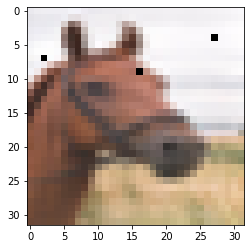

In [17]:
# Perturb test sets 0:100
attack_success_ct_3 = 0;

for id in range(100):
    pixels = 3
    max_iter = 10
    res = attack(id, model, pixel_count=pixels, verbose = True, maxiter=max_iter)
    if(res[5]):
        attack_success_ct_3 += 1
print('Attack success rate:', attack_success_ct_3/100.0)

The result of one-pixel attack is totally recognizable, which can be used as CAPTCHA.

However, the success rate of one-pixel attack is relatively low, especially when only 1 pixel is perturbed. 

max_iter also leads to multiple iterations to find ideal results, which is extremely slow and time-consuming.

# FO - Combine these two methods

So it is more recognizable with higher attack success rate and less attack time

use small e (like 0.01) and then use one-pixel attack to change only a few pixels in limited (and small) iterations

## Use FGSM to perturb image. 

In [19]:
e = 0.01
pixel = 2
max_iteration = 10
start_id = 0
end_id = 1000

In [20]:
x_f = data_preprocessing(x_test[start_id:end_id])
y_f = y_test[start_id:end_id]
perturbs = create_adversarial_pattern(x_f, y_f)
x_f_fgsm = x_f + perturbs * e

In [21]:
x_f_fgsm = tf.make_tensor_proto(x_f_fgsm) 
x_f_fgsm = tf.make_ndarray(x_f_fgsm)

In [22]:
x_f_fgsm.shape

(1000, 32, 32, 3)

In [23]:
x_f_fgsm[0].shape

(32, 32, 3)

## If this attack is successful, then we continue to the next image. If not, we conduct one-pixel attack.

In [24]:
def attack_(img_id, model, target=None, pixel_count=1, maxiter=20, popsize=400, verbose=False):
    targeted_attack = target is not None
    target_class = target if targeted_attack else y_op[img_id, 0]
    
    # Define bounds
    bounds = [(0,32), (0,32), (0,1), (0,1), (0,1)] * pixel_count
    
    # Population multiplier
    popmul = max(1, popsize // len(bounds))
    
    # Format the predict/callback functions
    def predict_fn(xs):
        return predict_classes(xs, x_f_fgsm[img_id], target_class, 
                               model, target is None)
    
    def callback_fn(x, convergence):
        return attack_success(x, x_f_fgsm[img_id], target_class, 
                              model, targeted_attack, verbose)
    
    # Differential Evolution
    attack_result = differential_evolution(
        predict_fn, bounds, maxiter=maxiter, popsize=popmul,
        recombination=1, atol=-1, callback=callback_fn, polish=False)

    attack_image = perturb_image(attack_result.x, x_f_fgsm[img_id])[0]
    prior_probs = model.predict(tf.reshape(x_f_fgsm[img_id], [1,32,32,3]))
    predicted_probs = model.predict(tf.reshape(attack_image,[1,32,32,3]))
    predicted_class = np.argmax(predicted_probs)
    actual_class = y_op[img_id, 0]
    success = predicted_class != actual_class
    cdiff = prior_probs[0][actual_class] - predicted_probs[0][actual_class]

    # Show the best attempt at a solution (successful or not)
    #plt.imshow(attack_image)
    #print('Target class is:', class_names[target_class])
    #print('Prediction class is: ', class_names[predicted_class])

    return [model.name, pixel_count, img_id, actual_class, predicted_class, success, cdiff, prior_probs, predicted_probs, attack_result.x]

In [25]:
def combine_attack(start_id, end_id, model, pixel, max_iteration):
    suc_ct = 0;
    size = (end_id - start_id) * 1.0

    for id in range(start_id, end_id):
        print('id=', id)
        p = np.argmax(model.predict(tf.reshape(x_f_fgsm[id], [1,32,32,3])))
        if(p == y_op[id][0]):
            res = attack_(id, model, pixel_count=pixel, verbose = False, maxiter=max_iteration)
            if(res[5]):
                suc_ct += 1
        else:
            suc_ct += 1
    print('Attack success rate:', suc_ct/size)

## Test on first 100 images

Test on a small set to see if this method works

In [57]:
combine_attack(0, 100, model, pixel, max_iteration)

id= 0
id= 1
id= 2
id= 3
id= 4
id= 5
id= 6
id= 7
id= 8
id= 9
id= 10
id= 11
id= 12
id= 13
id= 14
id= 15
id= 16
id= 17
id= 18
id= 19
id= 20
id= 21
id= 22
id= 23
id= 24
id= 25
id= 26
id= 27
id= 28
id= 29
id= 30
id= 31
id= 32
id= 33
id= 34
id= 35
id= 36
id= 37
id= 38
id= 39
id= 40
id= 41
id= 42
id= 43
id= 44
id= 45
id= 46
id= 47
id= 48
id= 49
id= 50
id= 51
id= 52
id= 53
id= 54
id= 55
id= 56
id= 57
id= 58
id= 59
id= 60
id= 61
id= 62
id= 63
id= 64
id= 65
id= 66
id= 67
id= 68
id= 69
id= 70
id= 71
id= 72
id= 73
id= 74
id= 75
id= 76
id= 77
id= 78
id= 79
id= 80
id= 81
id= 82
id= 83
id= 84
id= 85
id= 86
id= 87
id= 88
id= 89
id= 90
id= 91
id= 92
id= 93
id= 94
id= 95
id= 96
id= 97
id= 98
id= 99
Attack success rate: 0.86


## Test on first 1000 images

I do not have enough time to test on the whole test set. But since the set is randomly permuted, this result should be an acceptable representation of the whole test set.

In [26]:
combine_attack(0, 1000, model, pixel, max_iteration)

id= 0
id= 1
id= 2
id= 3
id= 4
id= 5
id= 6
id= 7
id= 8
id= 9
id= 10
id= 11
id= 12
id= 13
id= 14
id= 15
id= 16
id= 17
id= 18
id= 19
id= 20
id= 21
id= 22
id= 23
id= 24
id= 25
id= 26
id= 27
id= 28
id= 29
id= 30
id= 31
id= 32
id= 33
id= 34
id= 35
id= 36
id= 37
id= 38
id= 39
id= 40
id= 41
id= 42
id= 43
id= 44
id= 45
id= 46
id= 47
id= 48
id= 49
id= 50
id= 51
id= 52
id= 53
id= 54
id= 55
id= 56
id= 57
id= 58
id= 59
id= 60
id= 61
id= 62
id= 63
id= 64
id= 65
id= 66
id= 67
id= 68
id= 69
id= 70
id= 71
id= 72
id= 73
id= 74
id= 75
id= 76
id= 77
id= 78
id= 79
id= 80
id= 81
id= 82
id= 83
id= 84
id= 85
id= 86
id= 87
id= 88
id= 89
id= 90
id= 91
id= 92
id= 93
id= 94
id= 95
id= 96
id= 97
id= 98
id= 99
id= 100
id= 101
id= 102
id= 103
id= 104
id= 105
id= 106
id= 107
id= 108
id= 109
id= 110
id= 111
id= 112
id= 113
id= 114
id= 115
id= 116
id= 117
id= 118
id= 119
id= 120
id= 121
id= 122
id= 123
id= 124
id= 125
id= 126
id= 127
id= 128
id= 129
id= 130
id= 131
id= 132
id= 133
id= 134
id= 135
id= 136
id= 137
id= 13